In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [2]:
#download the weather images and put them in a directory
path = r'C:\Users\Josh Wattay\anaconda3\GAN - Generative Adversarial Network\Multi-class Weather Dataset' #your path here
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [3]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [4]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [5]:
# Verify size of data set
print(train_generator.n, train_generator.batch_size)
print(test_generator.n, test_generator.batch_size)

901 32
224 32


In [6]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile and run the model
# how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])

model.fit(
    train_generator, 
    epochs=24,  #<---------------------------------------------------------Adjust based on performance
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size,
)

Epoch 1/24


C:\Users\Josh Wattay\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.4250 - loss: 0.1572 - val_accuracy: 0.6205 - val_loss: 0.1208
Epoch 2/24
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5000 - loss: 0.1414
Epoch 3/24


C:\Users\Josh Wattay\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


28/28 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.7498 - loss: 0.0846 - val_accuracy: 0.8080 - val_loss: 0.0804
Epoch 4/24
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8750 - loss: 0.0680
Epoch 5/24
28/28 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7524 - loss: 0.0906 - val_accuracy: 0.8214 - val_loss: 0.0714
Epoch 6/24
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8750 - loss: 0.0475
Epoch 7/24
28/28 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7906 - loss: 0.0741 - val_accuracy: 0.7054 - val_loss: 0.1136
Epoch 8/24
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.0741
Epoch 9/24
28/28 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.8457 - loss: 0.0593 - val_accuracy: 0.7812 - val_loss: 0.0953
Epoch 10/24
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7188 - loss: 0.1032
Epoch 11/24
28/28 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.7983 - loss: 0.0738 - val_accuracy: 0.7054 - val_loss: 0.1283
Epoch 12/24
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 3

In [7]:
# Compile and run the model
# how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])

model.fit(
    train_generator, 
    epochs=28,  #<---------------------------------------------------------Adjust based on performance
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size,
     validation_freq=1  # This ensures validation at every epoch
)

Epoch 1/28
28/28 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.8624 - loss: 0.0583 - val_accuracy: 0.7500 - val_loss: 0.1122
Epoch 2/28
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8750 - loss: 0.0435
Epoch 3/28
28/28 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9190 - loss: 0.0324 - val_accuracy: 0.8705 - val_loss: 0.0589
Epoch 4/28
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9062 - loss: 0.0433
Epoch 5/28
28/28 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9113 - loss: 0.0343 - val_accuracy: 0.8214 - val_loss: 0.0786
Epoch 6/28
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9375 - loss: 0.0134
Epoch 7/28
28/28 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9008 - loss: 0.0359 - val_accuracy: 0.8438 - val_loss: 0.0655
Epoch 8/28
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9688 - loss: 0.0071
Epoch 9/28
28/28 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9600 - loss: 0.0183 - val_accuracy: 0.6964 - val_loss: 0.1308
Epoch 10/28
28/28 ━━━━━━━━━━━━━━━━

In [8]:
results = pd.DataFrame(model.history.history)

ValueError: All arrays must be of the same length

In [9]:
print(model.history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [10]:
# Check the length of each metric
for key, value in model.history.history.items():
    print(f"{key}: {len(value)}")

accuracy: 28
loss: 28
val_accuracy: 14
val_loss: 14


In [11]:
# Determine the minimum length to truncate the metrics
min_length = min(len(model.history.history['accuracy']), len(model.history.history['val_accuracy']))

# Truncate the metrics to the minimum length
accuracy_truncated = model.history.history['accuracy'][:min_length]
loss_truncated = model.history.history['loss'][:min_length]
val_accuracy_truncated = model.history.history['val_accuracy'][:min_length]
val_loss_truncated = model.history.history['val_loss'][:min_length]

# Convert the truncated data into a DataFrame
results = pd.DataFrame({
    'accuracy': accuracy_truncated,
    'loss': loss_truncated,
    'val_accuracy': val_accuracy_truncated,
    'val_loss': val_loss_truncated
})

# Display the DataFrame to verify the contents
print(results)

    accuracy      loss  val_accuracy  val_loss
0   0.882624  0.049296      0.750000  0.112236
1   0.875000  0.043494      0.870536  0.058868
2   0.904488  0.036805      0.821429  0.078648
3   0.906250  0.043338      0.843750  0.065532
4   0.917146  0.032030      0.696429  0.130812
5   0.937500  0.013360      0.808036  0.088108
6   0.918297  0.031674      0.790179  0.091993
7   0.968750  0.007143      0.843750  0.053644
8   0.927503  0.030992      0.808036  0.087337
9   0.812500  0.068654      0.857143  0.055917
10  0.886076  0.041277      0.870536  0.049373
11  0.937500  0.030540      0.799107  0.085968
12  0.913694  0.035588      0.857143  0.058553
13  0.812500  0.068872      0.825893  0.074052


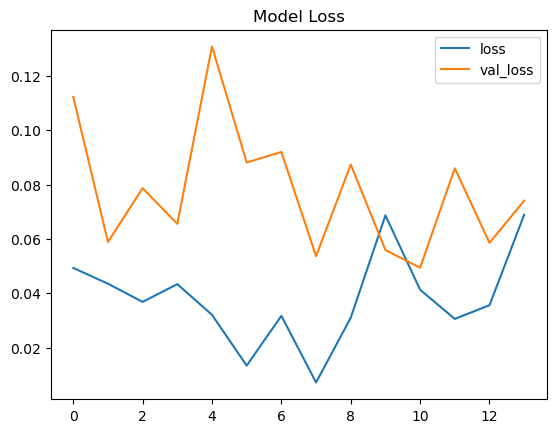

In [12]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

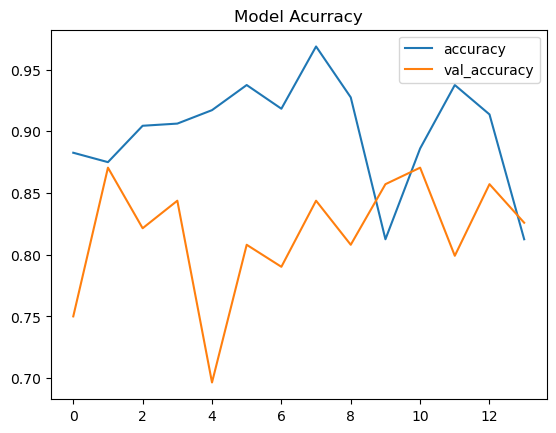

In [13]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [14]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.8125, Val_Accuracy: 0.8258928656578064
Loss: 0.06887184828519821, Val_Loss: 0.07405222952365875


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 415ms/step


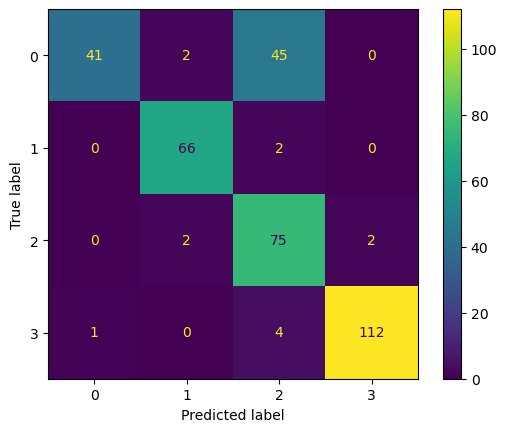

In [15]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [16]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


C:\Users\Josh Wattay\AppData\Local\Temp\ipykernel_10584\3625117412.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(k)


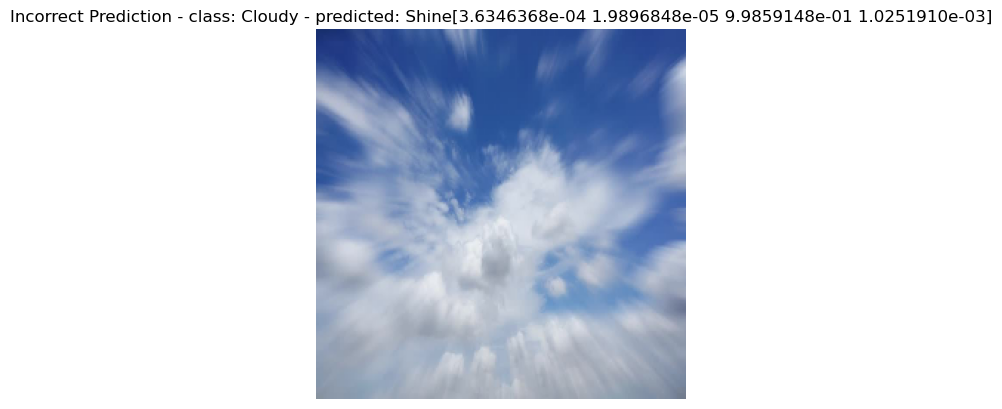

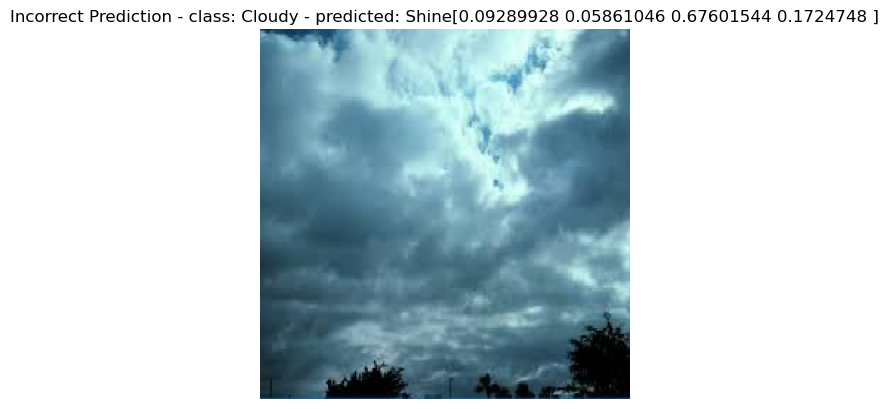

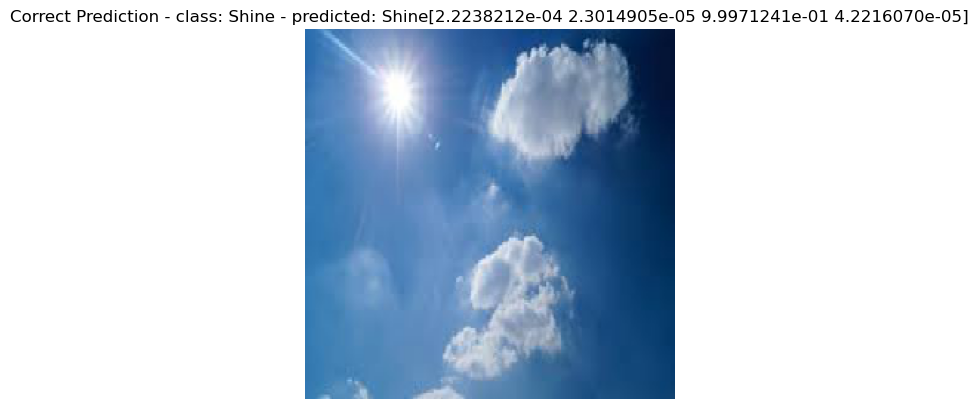

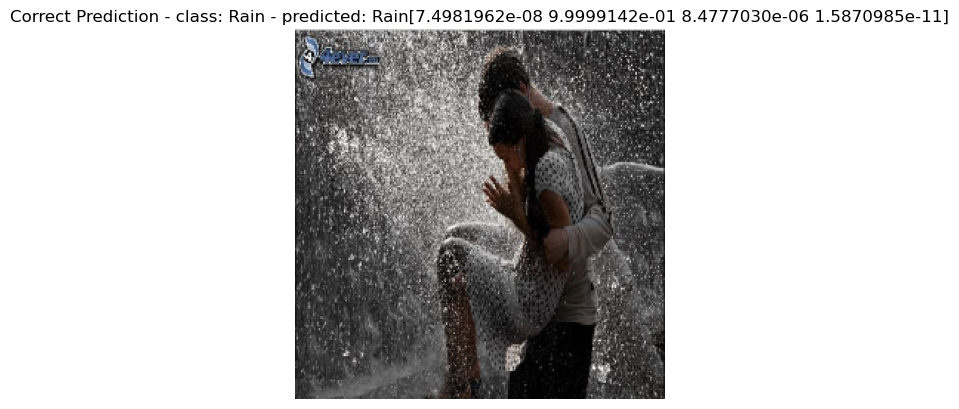

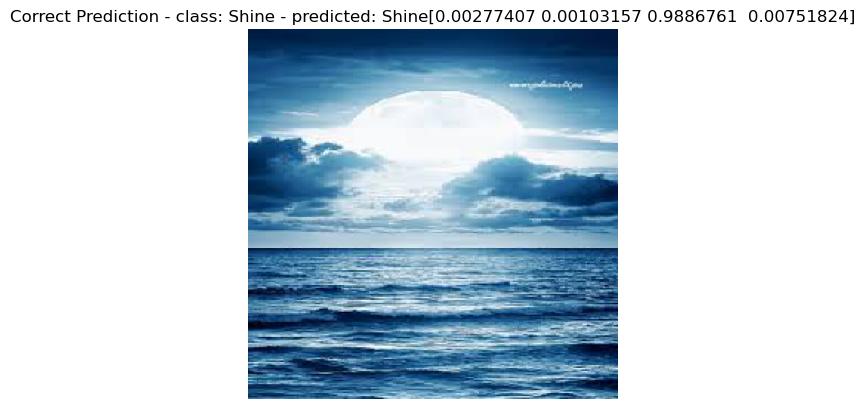

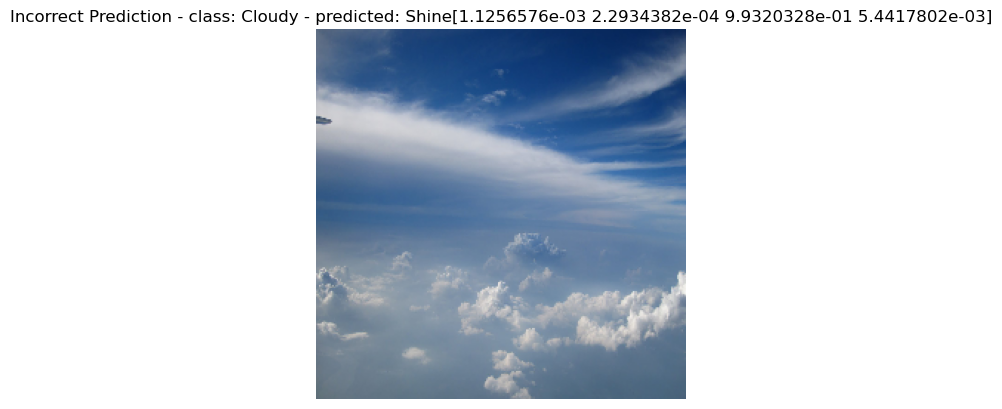

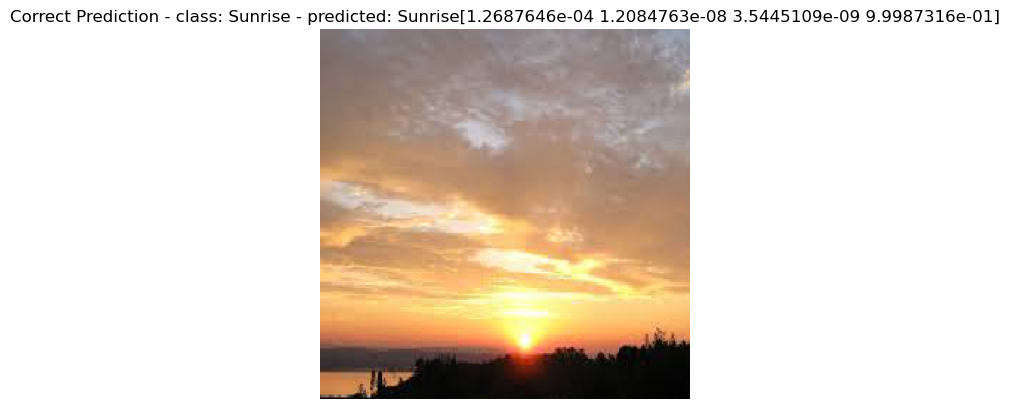

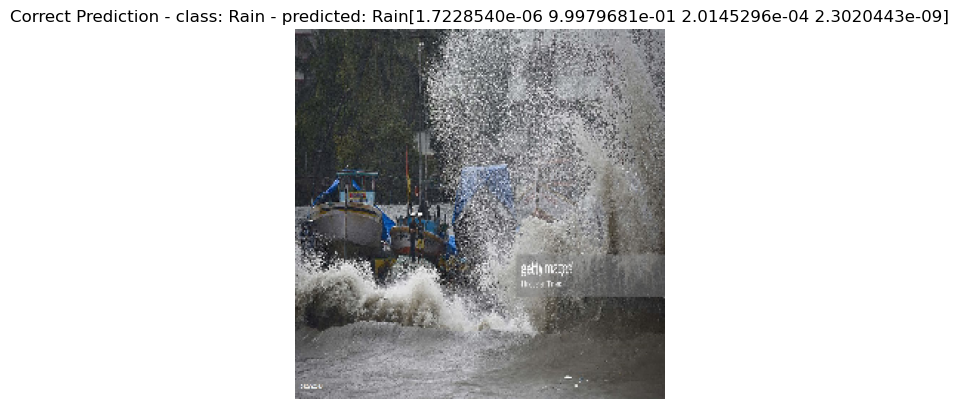

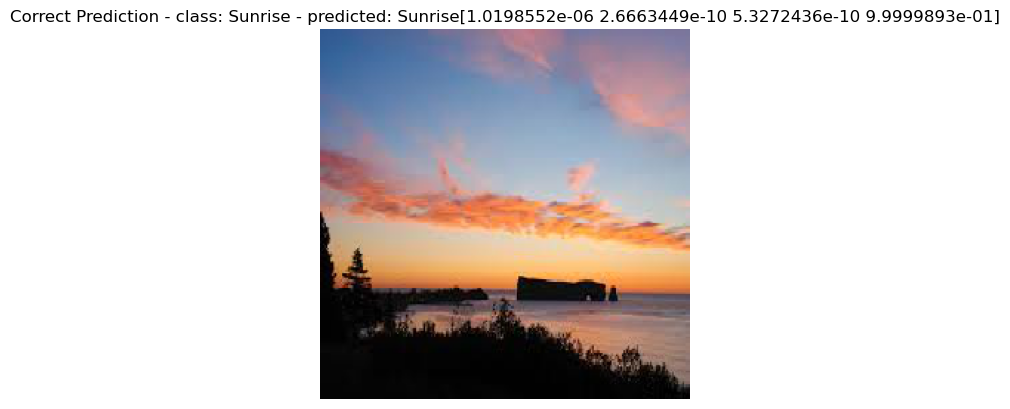

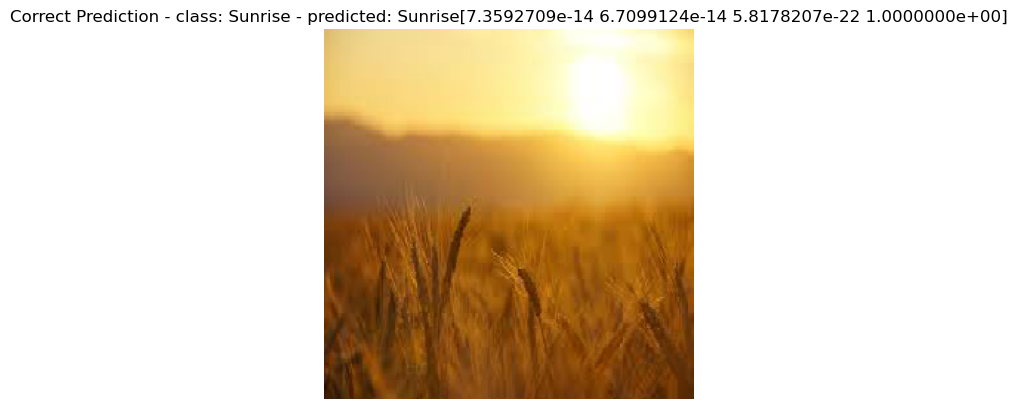

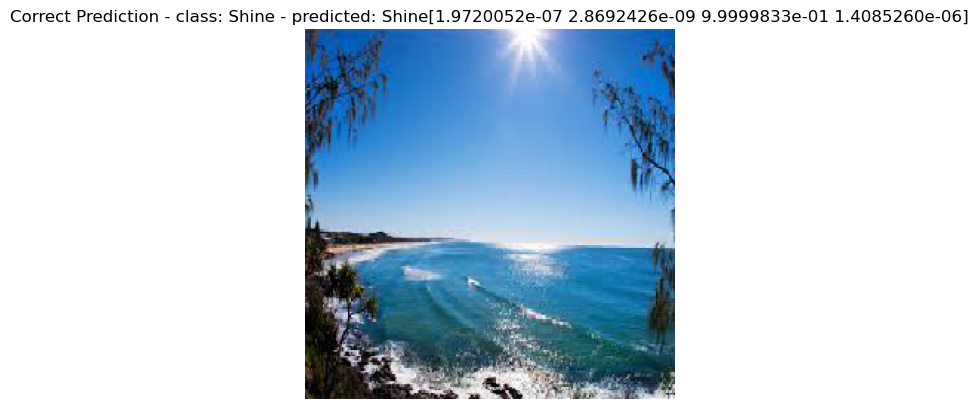

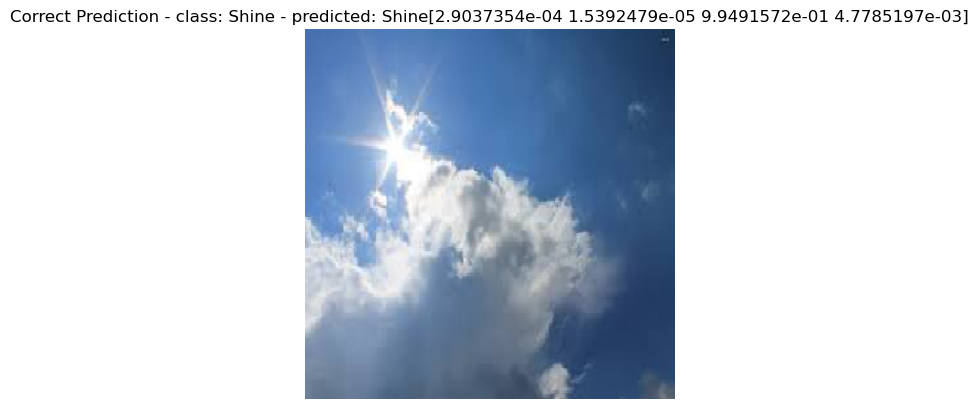

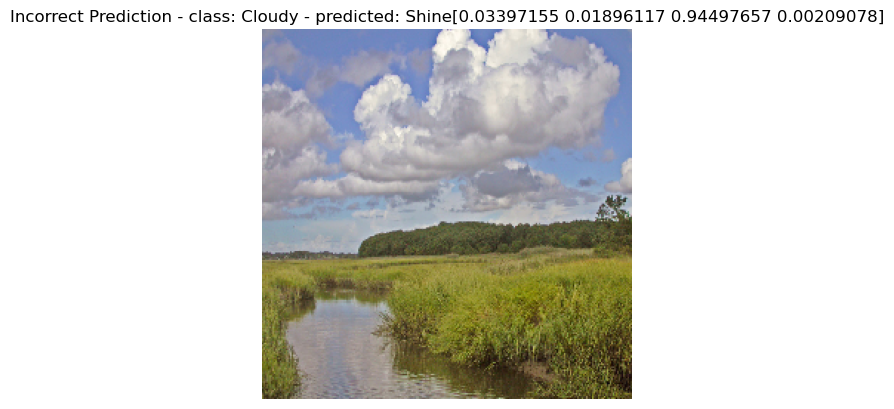

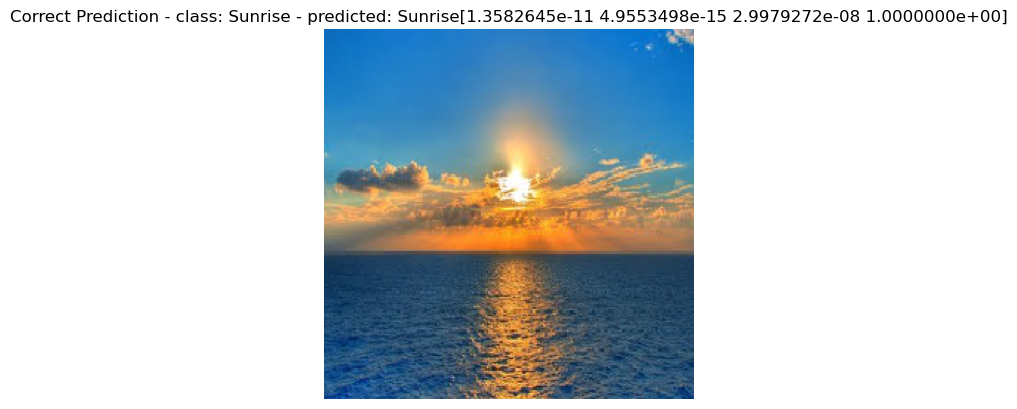

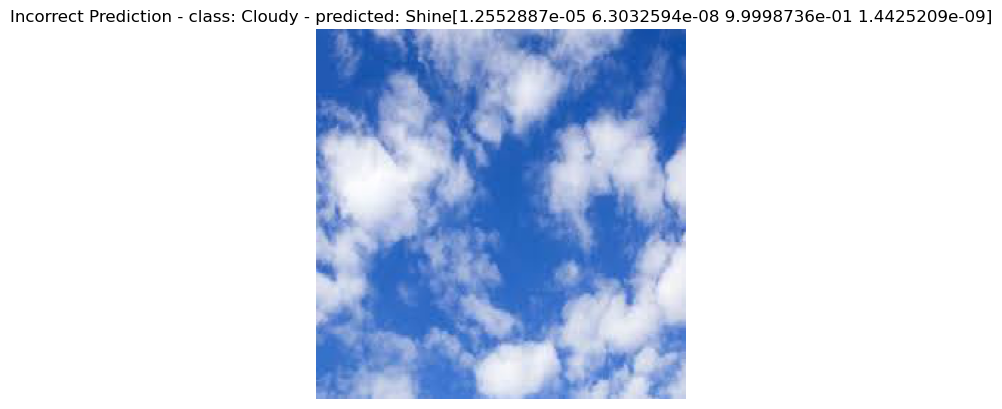

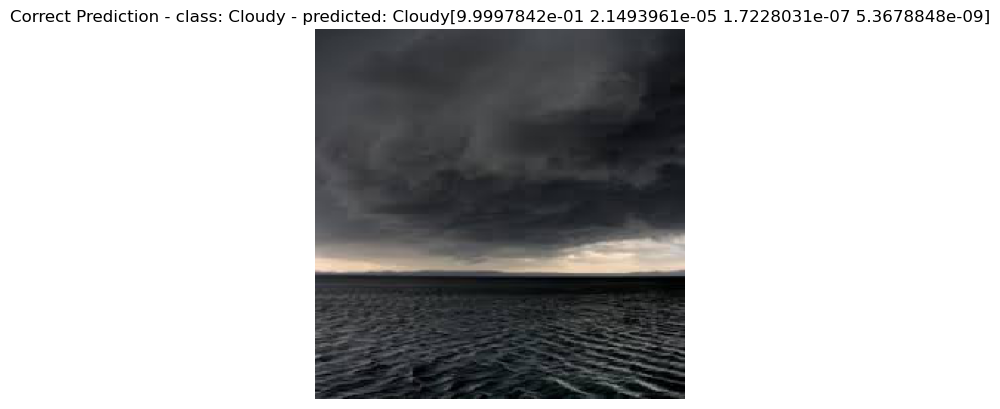

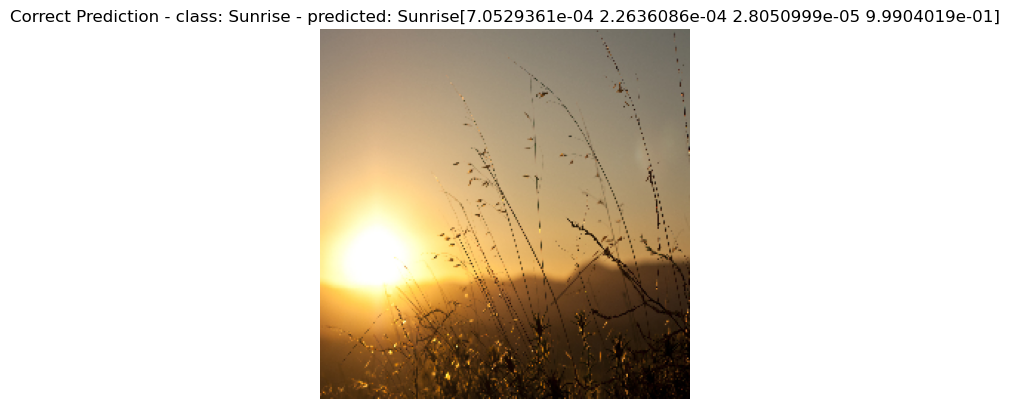

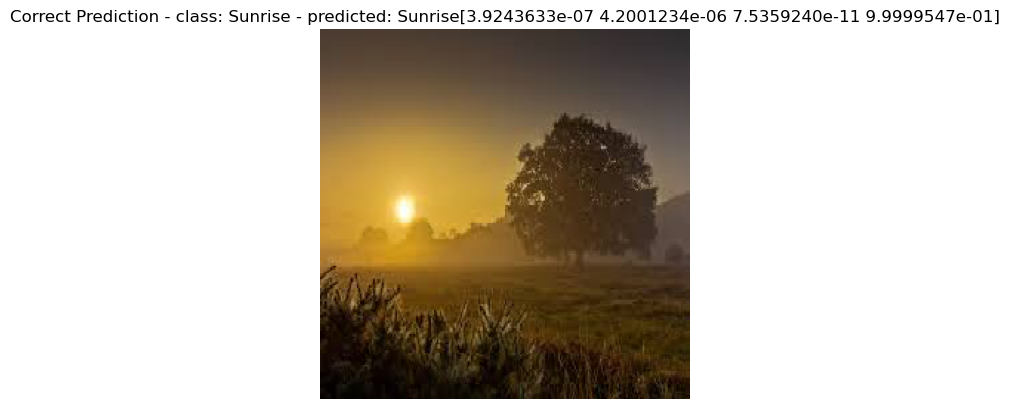

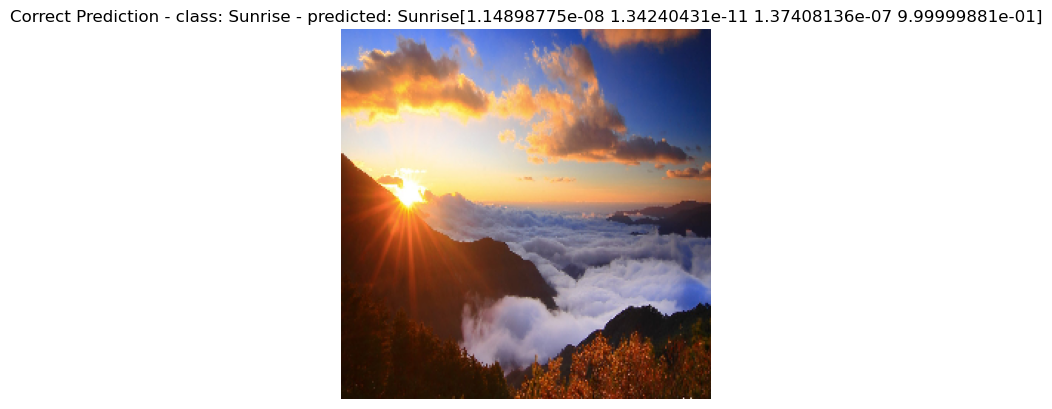

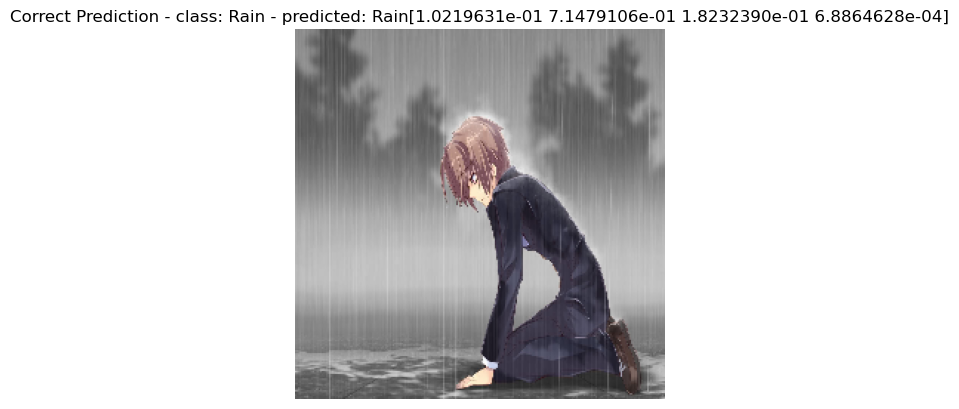

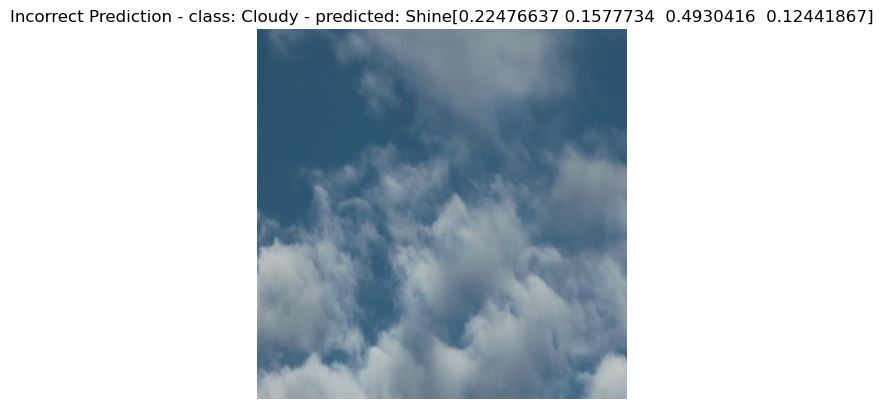

In [17]:
predict_one(model, 21) #<--you can show multiple pictures with this command. Just fill in the number you want to see.